In [1]:
import tensorflow as tf 
import os

In [2]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


In [3]:
num_classes = 2
#resnet_weight_paths = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
SAVE_MODEL = 'catvsdog_trainedmodel.hd5'

In [4]:
model = Sequential()

model.add(ResNet50(include_top=False,pooling='avg',weights='imagenet'))

model.add(Dense(num_classes,activation = 'softmax'))
#top layer is already trained
model.layers[0].trainable = False

In [5]:
from tensorflow.python.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
train_dir='D:/Deep Learning/dataset/training_set'
val_dir='D:/Deep Learning/dataset/test_set'

In [7]:
image_size=224
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING ,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        val_dir,
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
# Max number of steps that these generator will have opportunity to process their source content
# len(train_generator) should be 'no. of available train images / BATCH_SIZE_TRAINING'
# len(valid_generator) should be 'no. of available train images / BATCH_SIZE_VALIDATION'
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))

(100, 80, 100, 20)

In [9]:
num_epochs=10
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING ,
        epochs=num_epochs,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,)

Epoch 1/10
10/10 [==============================] - 67s 7s/step - loss: 0.3079 - acc: 0.8520 - val_loss: 0.1213 - val_acc: 0.9550
Epoch 2/10
10/10 [==============================] - 28s 3s/step - loss: 0.0848 - acc: 0.9670 - val_loss: 0.0622 - val_acc: 0.9790
Epoch 3/10
10/10 [==============================] - 24s 2s/step - loss: 0.1050 - acc: 0.9690 - val_loss: 0.0545 - val_acc: 0.9850
Epoch 4/10
10/10 [==============================] - 24s 2s/step - loss: 0.0609 - acc: 0.9750 - val_loss: 0.0483 - val_acc: 0.9860
Epoch 5/10
10/10 [==============================] - 24s 2s/step - loss: 0.0725 - acc: 0.9750 - val_loss: 0.0531 - val_acc: 0.9850
Epoch 6/10
10/10 [==============================] - 24s 2s/step - loss: 0.0542 - acc: 0.9800 - val_loss: 0.0587 - val_acc: 0.9810
Epoch 7/10
10/10 [==============================] - 24s 2s/step - loss: 0.0754 - acc: 0.9700 - val_loss: 0.0508 - val_acc: 0.9830
Epoch 8/10
10/10 [==============================] - 24s 2s/step - loss: 0.0483 - acc: 0.98

In [15]:
BATCH_SIZE_TESTING=1
dir_test="D:/Deep Learning/dataset/test"
test_generator = data_generator.flow_from_directory(
    directory = dir_test,
    target_size = (image_size, image_size),
    batch_size = BATCH_SIZE_TESTING,
    class_mode = None,
    shuffle = False,
    seed = 123
)

Found 12500 images belonging to 1 classes.


In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import cv2


In [18]:
# Reset before each call to predict
test_generator.reset()

pred = model.predict_generator(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

12500/12500 [==============================] - 637s 51ms/step


In [21]:
print(pred)  ## result of each class according to softmax
print(predicted_class_indices)  #np.argmax returns the index of the maximum value in each row 
##for e.g in 1st row(max =9.99..) it has index 1 so, returns 1, but in second row max value(9.9881..) has index 0 so it reurns 0 

[[2.1519312e-05 9.9997842e-01]
 [9.9881989e-01 1.1801438e-03]
 [9.9995959e-01 4.0418818e-05]
 ...
 [8.3504870e-05 9.9991643e-01]
 [9.9999714e-01 2.8434874e-06]
 [9.9963045e-01 3.6953975e-04]]
[1 0 0 ... 1 0 0]


(499, 381, 3)
(374, 500, 3)
(343, 499, 3)
(499, 288, 3)
(499, 467, 3)
(293, 499, 3)
(374, 500, 3)
(263, 500, 3)
(399, 488, 3)
(227, 249, 3)
(375, 499, 3)
(374, 500, 3)
(375, 499, 3)
(367, 489, 3)
(243, 250, 3)
(374, 500, 3)
(345, 400, 3)
(409, 335, 3)
(500, 470, 3)
(374, 500, 3)
(387, 500, 3)
(269, 240, 3)
(293, 250, 3)
(375, 434, 3)
(432, 499, 3)


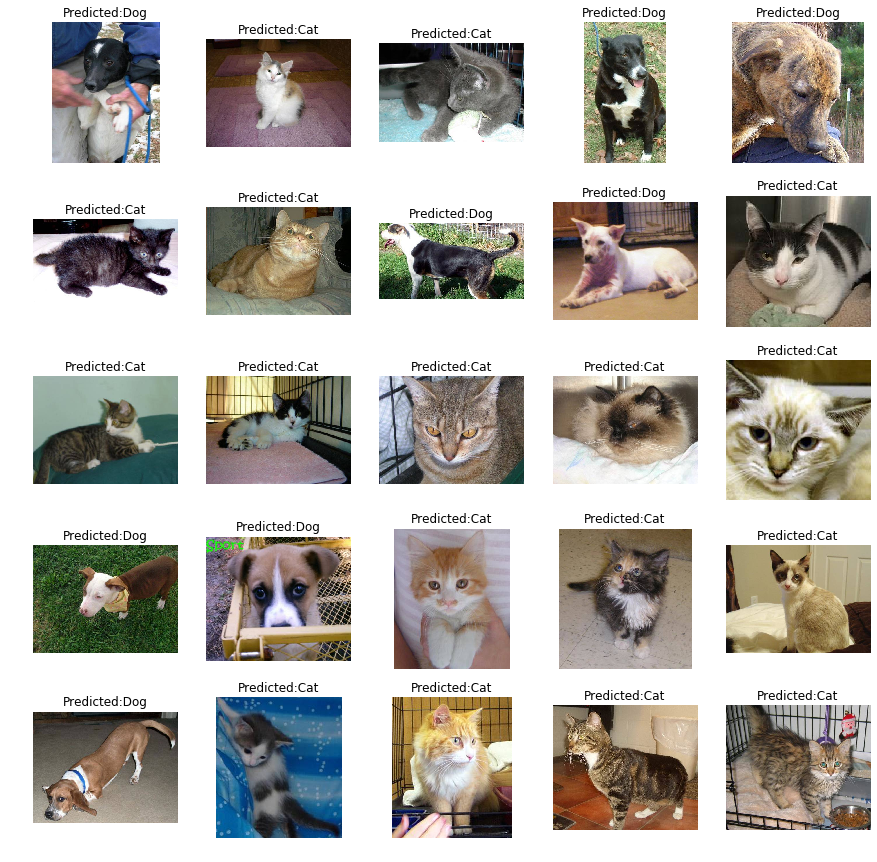

In [33]:
TEST_DIR ='D:/Deep Learning/dataset/test/'
f, ax = plt.subplots(5, 5, figsize = (15, 15))
for i in range(0,25):
    img = cv2.imread(TEST_DIR + test_generator.filenames[i])
    print(img.shape)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    predicted_class = "Dog" if predicted_class_indices[i] else "Cat"

    ax[i//5, i%5].imshow(imgRGB)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("Predicted:{}".format(predicted_class))    

plt.show()